In [1]:
import numpy as np
import pandas as pd

In [2]:
#df = pd.read_csv('laptopData.csv',encoding='latin-1')
df = pd.read_csv('laptop_price.csv',encoding='latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


- So from the look of the data, we can say that we have (Company name, TypeName, CPU, Ram, Memory, GPU, Weight, Price)
- This will be used to find out the actual market price of a particular laptop. 

- The only problem here is that the dataset is not huge, hence we can make good R2 score but we could make much stronger model if dataset was had more data.

- However, I took this data because there are enough opportunities to perform EDA and Feature engineering. For instance, (Conatins IPS display or not), (Screen Resolution), (Processor version) , (Processor speed in GHz), (GPU) etc

- If we do great feature engineering in this project it can create great model.

- Initially, we will try to find out the information about the dataset 

In [4]:
print(df.shape, '\n')
print(df.info())

(1303, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None


- Laptop_ID column is not necessary here because that is just the index column
- Company, TypeName,  is object(String)
- Inches is object(String) type which is not better approach as all the values would be in float64, Hence need to convert the datatype of 'Inches' column.


In [5]:
df.duplicated().sum()

0

- This gives us that how many rows are duplicated in the dataset. However, in this dataset the duplicated rows are none

In [6]:
df.isnull().sum()


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

- This shows each columns has how many missing values

In [7]:
df.drop(columns=['laptop_ID'], inplace = True)

- Removing the Laptop_ID column which was index column

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [9]:
# Removing GB from Ram column
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')
df.rename(columns = {'Weight':'Weight(Kg)', 'Ram': 'Ram(GB)'}, inplace=True)

# Weight is an object(String type) because of 'kg' present before in the dataset. Now, after
# removing 'kg' from data the value is only float64 type. Similarly, for the Ram column as well

df['Ram(GB)'] = df['Ram(GB)'].astype('int64')
df['Weight(Kg)'] = df['Weight(Kg)'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram(GB)           1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight(Kg)        1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


- "Ram" column contains values like '8GB' which is (object) type and instead of that it is better to convert the datatype to (int) so that it is easy to correlate with the similar typed features.

- Hence, I am generalizing GB in the heading of the column and removing it from the values. Also, changing its datatype.

- Also, doing the same thing with the "Weight" column.

In [10]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\3316015423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

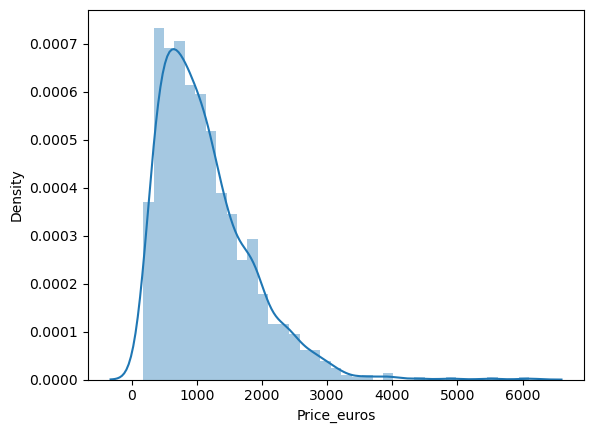

In [11]:
import seaborn as sns
sns.distplot(df['Price_euros'])

- This is the distribution of Laptop data related to the Price(euros).
- It clearly indicates that there are more laptops with less price and vise-versa.

<Axes: >

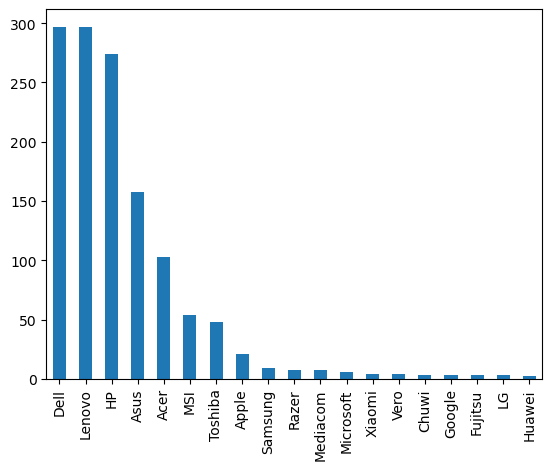

In [12]:
# To know each brand has how many laptops
df['Company'].value_counts().plot(kind = 'bar')

- This plot helps to know that each brand has how many laptops in this dataset

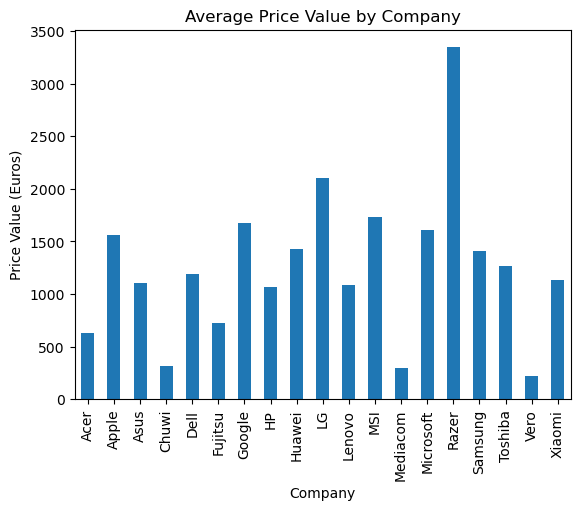

In [13]:
# For each brand what is the average price value

import matplotlib.pyplot as plt
df_grouped = df.groupby('Company')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price Value by Company')
plt.xlabel('Company')
plt.ylabel('Price Value (Euros)')
plt.show()

- This plot represents the Average Price of Laptop based on different brands. 

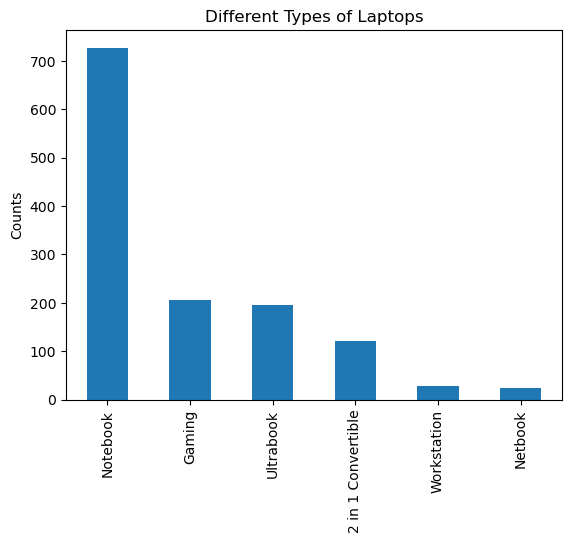

In [14]:
# Trying to understand how many different types of laptops are present 
df['TypeName'].value_counts().plot(kind='bar', title = 'Different Types of Laptops') 
plt.ylabel('Counts')
plt.show()

- This plot shows number of different types of laptops in the dataset

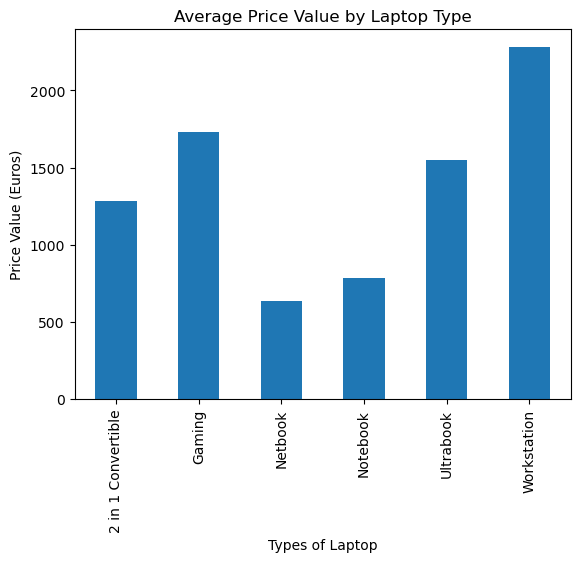

In [15]:
# Type and Price relation 

df_grouped = df.groupby('TypeName')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price Value by Laptop Type')
plt.xlabel('Types of Laptop')
plt.ylabel('Price Value (Euros)')
plt.show()

- This plot represents the Average Price of Laptop based on different Types of Laptops. 

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\2289079760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

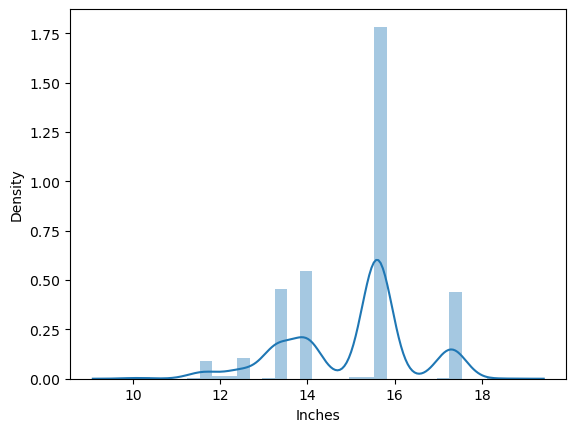

In [16]:
# Trying to understand no. of laptops of certain screen size (inches)
sns.distplot(df['Inches'])

- Trying to understand no. of laptops of certain screen size (inches)

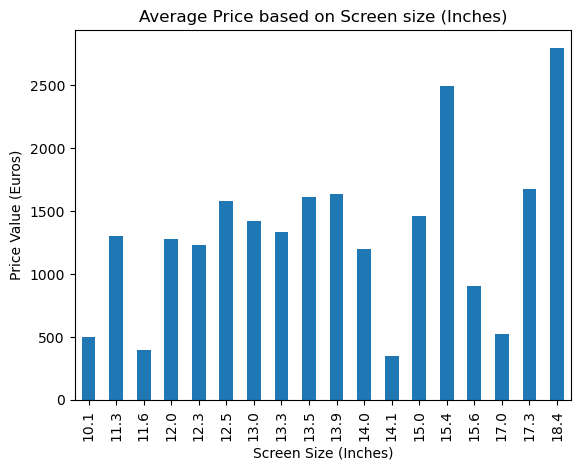

In [17]:
# df.plot.bar(x='Inches', y='Price_euros')
df_grouped = df.groupby('Inches')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price based on Screen size (Inches)')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price Value (Euros)')
plt.show()

- This plot represents the Average Price of Laptop based on different screen sizes of Laptops (inches). 
- This bar plot does not give us the clear picture of the relation and distribution of data properly. Hence plotting using scatterplot.

<Axes: xlabel='Inches', ylabel='Price_euros'>

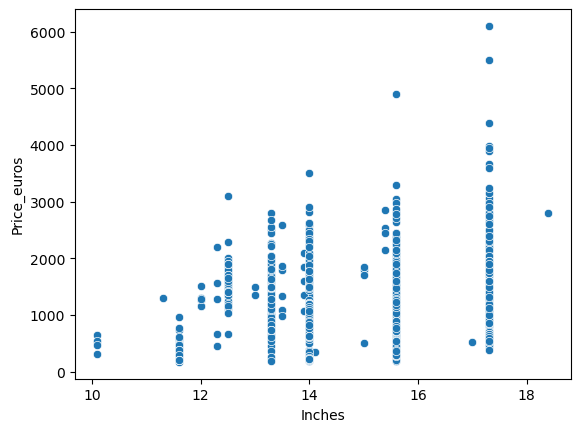

In [18]:
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])


- This scatterplot helps us understand that there is not a strong correlation as the prices are not drastically changing based on the inches of the laptop. However, there is small correlation because there is a minor difference on prices based on inches of the laptop.

### Working on the ScreenResolution column

In [19]:
# Working on the ScreenResolution column
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### 1) From this we can extract information (Touchscreen laptop or not), 

### 2) IPS panel is present or not

### 3) The resolution is common in each type (e.g. 1920x1080) etc

### 4) Based on the resolution, I can find the PPI (Pixel per inch) which is also an important criteria in Laptop Price. 

- For that { sqrt[ (X_resolution)^2 + (Y_resolution)^2) ] / Inches } 

- I will create new column for all the above information using ScreenResolution column


In [20]:
# 1)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# 2)
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

# 3)
temp = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_resolution'] = temp[0] #e.g. IPS Panel Full HD / Touchscreen 1920
df['Y_resolution'] = temp[1] #e.g. 1080

## using regular expression to extract "x_resolution" from the string (Object) type
df['X_resolution'] = df['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram(GB)           1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight(Kg)        1303 non-null   float64
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS Panel         1303 non-null   int64  
 14  X_resolution      1303 non-null   object 
 15  Y_resolution      1303 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory

- Here the "X_resolution" and "Y_resolution" columns are in (Object) type. But the values present in are all int type. 

- Hence, need to change the datatype

In [21]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,X_resolution,Y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [22]:
df['X_resolution'] = df['X_resolution'].astype('int64')
df['Y_resolution'] = df['Y_resolution'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram(GB)           1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight(Kg)        1303 non-null   float64
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS Panel         1303 non-null   int64  
 14  X_resolution      1303 non-null   int64  
 15  Y_resolution      1303 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory 

In [23]:
df['PPI'] = (((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5/df['Inches']).astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram(GB)           1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight(Kg)        1303 non-null   float64
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS Panel         1303 non-null   int64  
 14  X_resolution      1303 non-null   int64  
 15  Y_resolution      1303 non-null   int64  
 16  PPI               1303 non-null   float64


In [24]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,X_resolution,Y_resolution,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


##### Understanding how many laptops are touchscreen or not

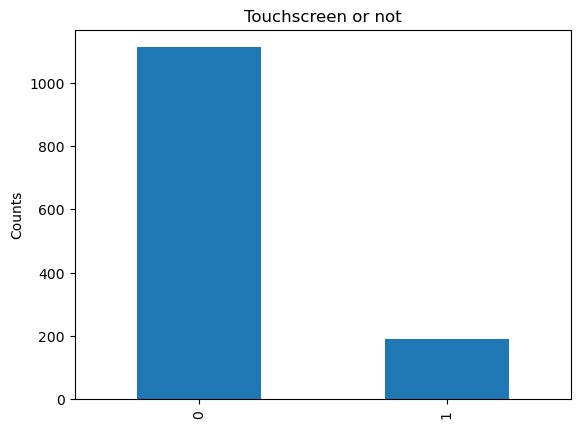

In [25]:
# Understanding how many laptops are touchscreen or not

df['Touchscreen'].value_counts().plot(kind='bar', title = 'Touchscreen or not') 
plt.ylabel('Counts')
plt.show()

##### Touchscreen with Price relation

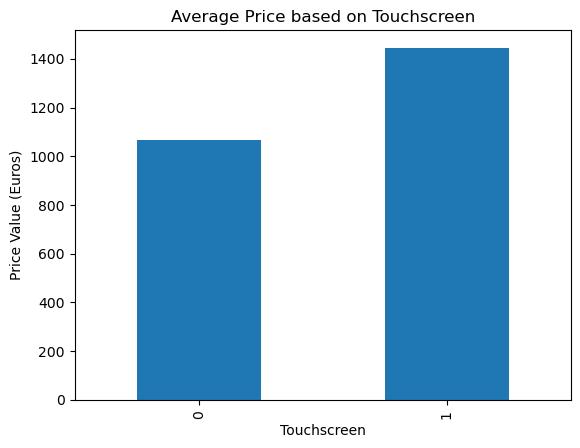

In [26]:
# Touchscreen with Price relation
df_grouped = df.groupby('Touchscreen')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price based on Touchscreen')
plt.xlabel('Touchscreen')
plt.ylabel('Price Value (Euros)')
plt.show()

#####  How many laptops has IPS panel

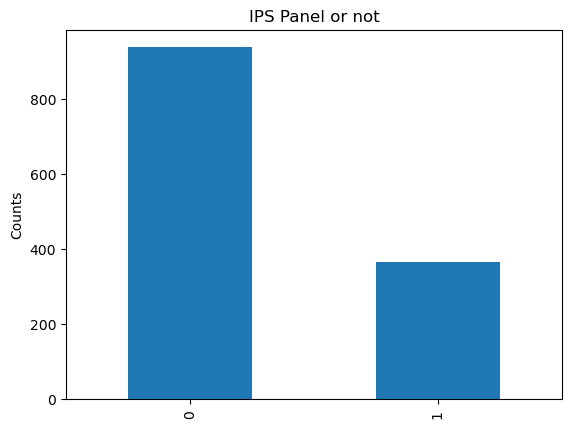

In [27]:
# Looking at how many laptops are having IPS panel

df['IPS Panel'].value_counts().plot(kind='bar', title = 'IPS Panel or not') 
plt.ylabel('Counts')
plt.show()

##### IPS Panel with Price relation

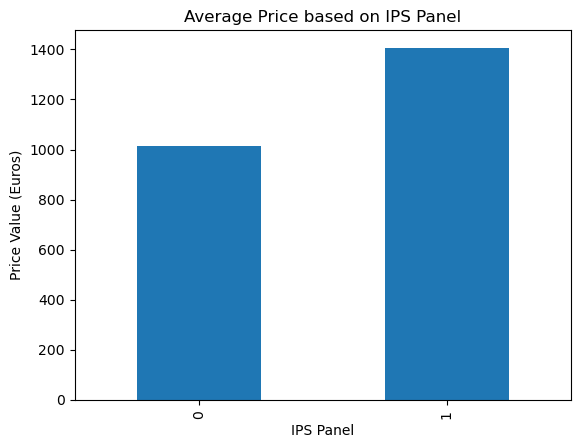

In [28]:
df_grouped = df.groupby('IPS Panel')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price based on IPS Panel')
plt.xlabel('IPS Panel')
plt.ylabel('Price Value (Euros)')
plt.show()

##### Looking at the correlation of features with target variable (Price_euros)

In [29]:
df.corr()['Price_euros']

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\3238765375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price_euros']


Inches          0.068197
Ram(GB)         0.743007
Weight(Kg)      0.210370
Price_euros     1.000000
Touchscreen     0.191226
IPS Panel       0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price_euros, dtype: float64

##### - From this we can say that rather than using (Inches, X_resolution, Y_resolution), we can use PPI which seems to have strong correlation

#### Now as we have extracted all the information from the "ScreenResolution" column. We can drop that column

- Also, from correlation conclusion, we can aslo drop Inches, X_resolution and Y_resolution

In [30]:
df.drop(columns=['ScreenResolution','Inches','X_resolution','Y_resolution'],inplace=True)
df.head()

,Company,Product,TypeName,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


### Now coming to the 'CPU' column

In [31]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

- This represents that the cpu brands are among (Intel & AMD). Hence, we can extract this information as well because cpu brand also relates to the Price of the laptops

- We can extract if the processor is (i5, i7, other intel processors, amd processors)

In [32]:
df['Processor_Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) 
## putting [" ".join()] because the datatype would be list if I don't write this code

## Now creating a custom function to extract only the information of the processor
def extract_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
## Applying this custom function on the newly created column ['Processor_Name']
df['Processor_Name'] = df['Processor_Name'].apply(extract_processor)

df.head()

,Company,Product,TypeName,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


##### Types of Processors in plot format

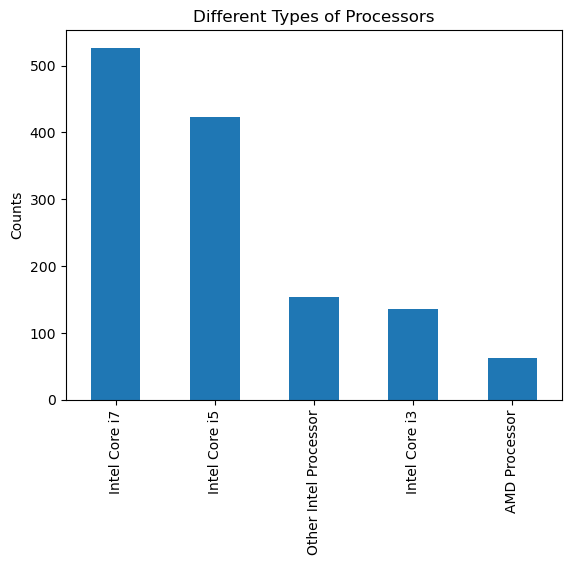

In [33]:
# Trying to understand types of Processors in graph
df['Processor_Name'].value_counts().plot(kind='bar', title = 'Different Types of Processors') 
plt.ylabel('Counts')
plt.show()

##### Processors and Price relation

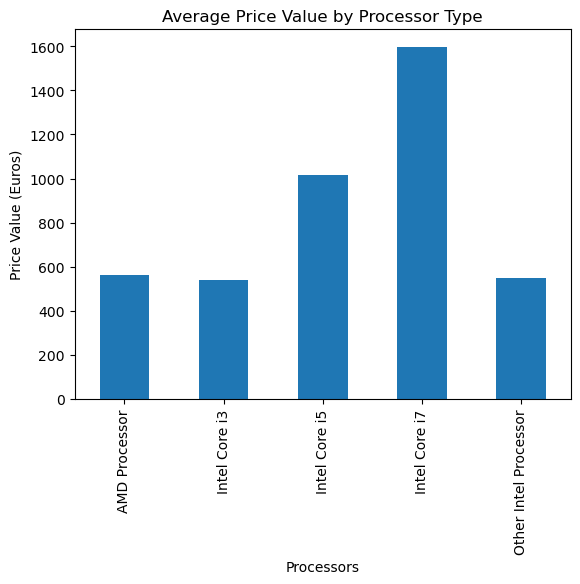

In [34]:
# Processors and Price relation 

df_grouped = df.groupby('Processor_Name')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price Value by Processor Type')
plt.xlabel('Processors')
plt.ylabel('Price Value (Euros)')
plt.show()

##### Now as we have extracted the information from CPU column. We do not require it

In [35]:
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,Product,TypeName,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


### Now coming to the 'Ram' column

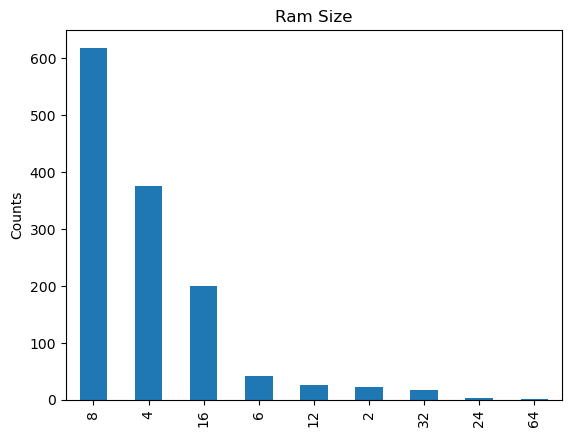

In [36]:
# Trying to understand types of Ram in graph
df['Ram(GB)'].value_counts().plot(kind='bar', title = 'Ram Size') 
plt.ylabel('Counts')
plt.show()

##### Ram and Price relation

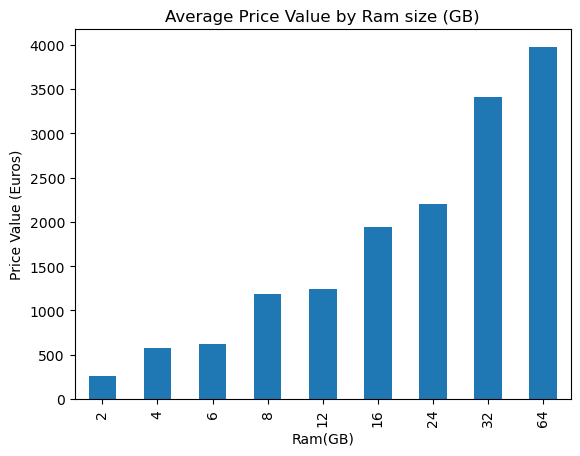

In [37]:
# Ram and Price relation 

df_grouped = df.groupby('Ram(GB)')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price Value by Ram size (GB)')
plt.xlabel('Ram(GB)')
plt.ylabel('Price Value (Euros)')
plt.show()

### Now coming to the 'Memory' column

In [38]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

- From this we can extract information like (HDD, SDD, Hybrid, Flash Storage). All of these can impact the prices of laptops

- Hence, I will be creating individual columns of each information and later on find out the correlation of each with the price (target variable) which will help me know which has more impact.

In [39]:
# Now, the below line of code will extract the information from the 'Memory' column and create
# seperate individual columns with its value.
# For example, if the SSD value present then all other column values will be zero. In short any
# information present will be assigned to respective columns and not present will be zero


df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\418055743.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\418055743.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [40]:
df.head()

,Company,Product,TypeName,Ram(GB),Memory,Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


- Now as we have extracted the information from the 'Memory' column. We can drop that column and understand the correlation of the extracted information.

In [41]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,Product,TypeName,Ram(GB),Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [42]:
df.corr()['Price_euros']

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\3238765375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price_euros']


Ram(GB)          0.743007
Weight(Kg)       0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS Panel        0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

- Here we can see that "Flash Storage" , "Hybrid" and "HDD" has very less impact on the Laptop price.
- Generally, HDD and SSD are the most common types of storage available now in laptops. 
- Hence, removing information other than HDD and SSD from the dataset is valid

In [43]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,Product,TypeName,Ram(GB),Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


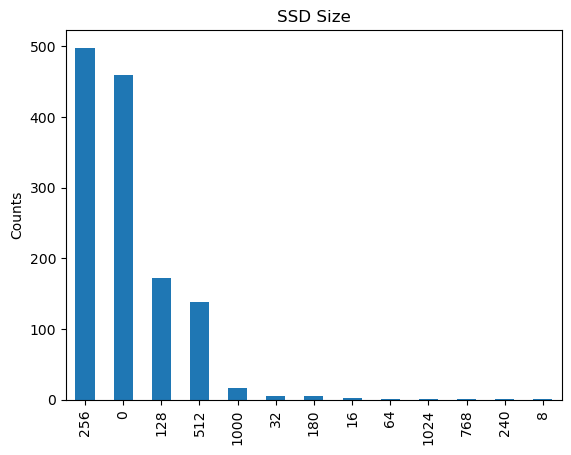

In [44]:
# Trying to understand different SSD sizes in graph
df['SSD'].value_counts().plot(kind='bar', title = 'SSD Size') 
plt.ylabel('Counts')
plt.show()

- Here there are many laptops with 0 SSD size, because certain laptops only has HDD and not SSD

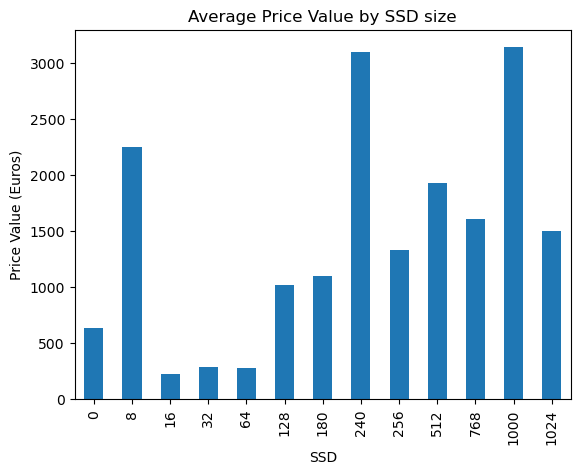

In [45]:
# SSD and Price relation 

df_grouped = df.groupby('SSD')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price Value by SSD size')
plt.xlabel('SSD')
plt.ylabel('Price Value (Euros)')
plt.show()

### Now coming to 'GPU' column

In [46]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

- This represents distinct GPU brands
- GPU brands also makes an impact on laptop prices. Hence extracting information and creating seperate columns

In [47]:
df['GPU Name'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,Product,TypeName,Ram(GB),Gpu,OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,GPU Name
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [48]:
df['GPU Name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Name, dtype: int64

- From this we can see that there is only 1 laptop which has ARM (GPU brand).

In [49]:
df = df[df['GPU Name'] != 'ARM']
df['GPU Name'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU Name, dtype: int64

- As we have extracted the information from the GPU column. We can drop that column

In [50]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,Product,TypeName,Ram(GB),OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,GPU Name
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


##### GPU brand and Price relation

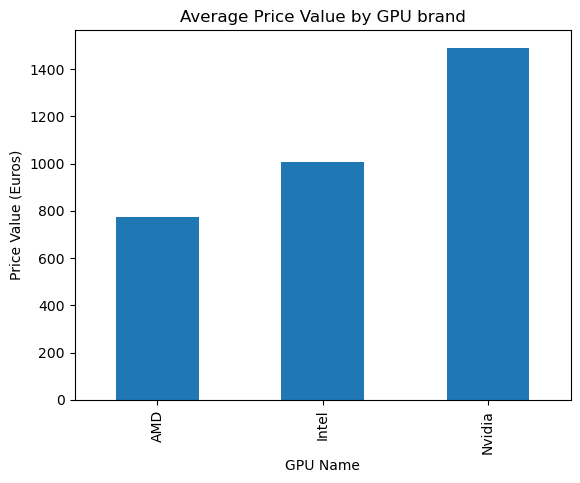

In [51]:
# GPU Name and Price relation 

df_grouped = df.groupby('GPU Name')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price Value by GPU brand')
plt.xlabel('GPU Name')
plt.ylabel('Price Value (Euros)')
plt.show()

### Now coming to the "OpSys" column  (Operating System)

In [52]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

- We are all aware that there are 2 major OS in laptop (Windows and Mac). Here we can see different types of OS.
- I will try to extract information from this column and create 3 seperate columns (Windows, MAC, Other) which will help me to easily understand the relation of OS and Price of Laptop

###### Creating custom function to extract OS information and form seperate columns

In [53]:
def operating_system(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows OS'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac OS'
    else:
        return 'Other OS'
    
df['Operating_System'] = df['OpSys'].apply(operating_system)
df.head()

,Company,Product,TypeName,Ram(GB),OpSys,Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,GPU Name,Operating_System
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac OS
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac OS
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Other OS
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac OS
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac OS


- As we have extracted the OS information from "OpSys" column. We can drop it.

In [54]:
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,Product,TypeName,Ram(GB),Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,GPU Name,Operating_System
0,Apple,MacBook Pro,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac OS
1,Apple,Macbook Air,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac OS
2,HP,250 G6,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Other OS
3,Apple,MacBook Pro,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac OS
4,Apple,MacBook Pro,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac OS


##### Operating System and Price relation

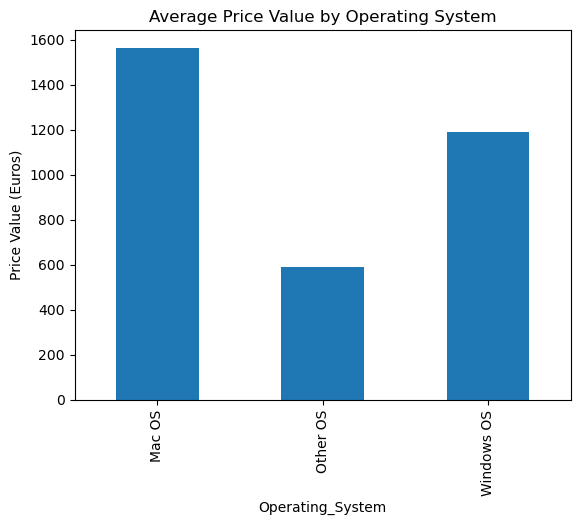

In [55]:
# OS and Price relation 

df_grouped = df.groupby('Operating_System')['Price_euros'].mean()
df_grouped.plot(kind='bar', title='Average Price Value by Operating System')
plt.xlabel('Operating_System')
plt.ylabel('Price Value (Euros)')
plt.show()

##### Weight(Kg) and Price relation

- Creating a scatterplot is better approach rather than barplot as the weight value are largely distinct in the dataset. Hence, looking at the scatterplot we can understand the relation of weight with the price of laptop

<Axes: xlabel='Weight(Kg)', ylabel='Price_euros'>

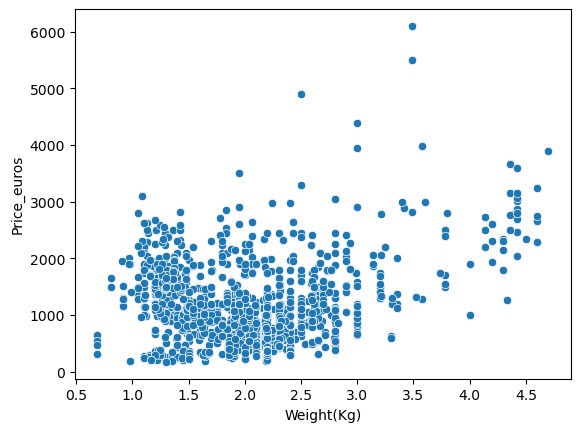

In [56]:
sns.scatterplot(x=df['Weight(Kg)'],y=df['Price_euros'])

### Looking at the correlation of each column with other columns

In [57]:
df.corr()

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ram(GB),Weight(Kg),Price_euros,Touchscreen,IPS Panel,PPI,HDD,SSD
Ram(GB),1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight(Kg),0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price_euros,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
IPS Panel,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
PPI,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


- Now, viewing correlation in the form of heatmap to better understand

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

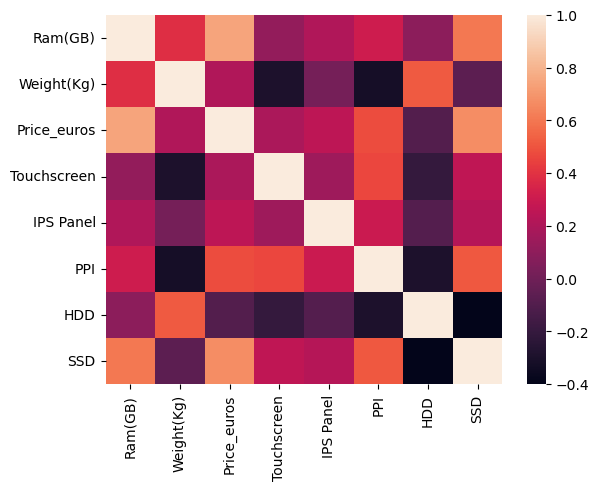

In [58]:
sns.heatmap(df.corr())

### Now looking at our Target Variable (Price_euros)

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\2073861339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

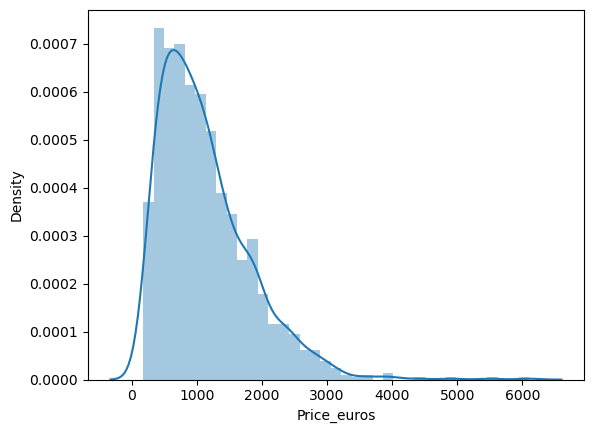

In [59]:
sns.distplot(df['Price_euros'])

##### This plot shows that our target variable is skewed

- It means that the distribution of the values are not symmetric and has a long tail on one side.
- It impacts the performance and accuracy of some ML algos. 

- Hence, inorder to deal with this, we can transform the target variable using mathematical function (log) to make it more symmetric.

C:\Users\harsh\AppData\Local\Temp\ipykernel_7336\4231476745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

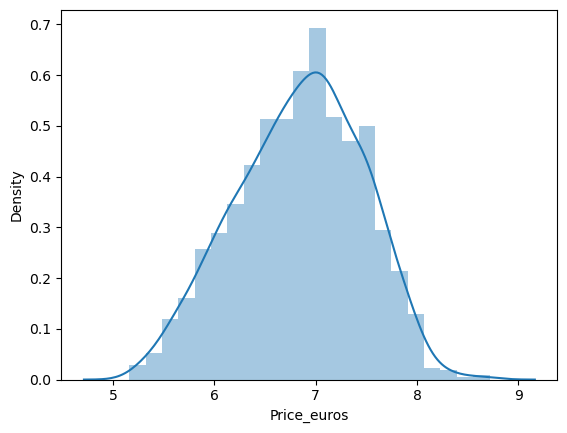

In [60]:
df['Price_euros'] = np.log(df['Price_euros'])
sns.distplot(df['Price_euros'])

### Now creating Feature variable and Target variable

In [61]:
# Product Name column is not important relation with respect to the price, because Laptop prices
# always depend on its specifications details. Hence removing Product column
X = df.drop(columns=['Price_euros', 'Product'])
Y = df['Price_euros']

In [62]:
X

,Company,TypeName,Ram(GB),Weight(Kg),Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,GPU Name,Operating_System
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac OS
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac OS
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac OS
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac OS
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows OS
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows OS
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows OS
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows OS


In [63]:
Y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

### Splitting into Training and Testing Dataset

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

X_train

,Company,TypeName,Ram(GB),Weight(Kg),Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,GPU Name,Operating_System
197,HP,Notebook,8,1.49,0,0,165.632118,Intel Core i5,0,512,Intel,Windows OS
915,Lenovo,Notebook,4,1.44,0,0,165.632118,Intel Core i5,0,128,Intel,Windows OS
525,Lenovo,Notebook,8,2.02,0,0,157.350512,Intel Core i5,0,256,Intel,Windows OS
128,Dell,Notebook,16,2.80,0,0,127.335675,Intel Core i7,2000,256,AMD,Windows OS
400,Lenovo,Notebook,4,2.20,0,0,100.454670,Other Intel Processor,1000,0,Intel,Windows OS
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows OS
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows OS
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows OS
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Other OS


### Importing necessary libraries for model creation

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score,mean_absolute_error

- Here I will need to do the column transformation as the dataset contains categorical variables and we need numerical variables.
- Hence, I am using ColumnTransformer and OneHotEncoding to convert categorical variables into the Numerical variables.

- In OneHotEncoder parameters, I am using "drop=first" inorder to reduce multi-collinearity, and also (remainder='passthrough') because I don't to apply it on the rest of the columns not listed for encoding.

In [66]:
X.head(1)

,Company,TypeName,Ram(GB),Weight(Kg),Touchscreen,IPS Panel,PPI,Processor_Name,HDD,SSD,GPU Name,Operating_System
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac OS


### Using Random Forest supervised learning algorithm here.

###### Reason behind choosing Random Forest Algorithm

- Random forest is a powerful and versatile algorithm for both classification and regression problems, where the output variable can be either categorical or continuous. 
- As Random forest builds many decision trees based on random subsets of the data and features, and combines their predictions by averaging or voting creates great ML model 
- It also has capabilities to handle non-linearity, interactions, and missing values in the data, and can also provide feature importance scores. 
- However, random forest may overfit the data if not tuned properly. 

In [67]:
from sklearn.ensemble import RandomForestRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))
print('Error difference in Price(Euros) : ', np.exp(mean_absolute_error(Y_test,Y_pred)))

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8551280670422118
MAE 0.17138443155298824
Error difference in Price(Euros) :  1.1869469611885217


- Here I am using R2 score to identify how well the model fits the data
- MAE will show the measure of errors between the given parameters. Hence, actual and predicted value

- The error difference is 1.18 euros 

### Hyperparameter Tuning using GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60], # the number of trees in the forest
    'max_depth': [5, 10, 15], # the maximum depth of each tree
    'min_samples_split': [2, 4, 6, 8], # the minimum number of samples required to split a node
    'max_features': ['auto', 'sqrt', 'log2'], # no. of features to consider when looking for the best split
    'bootstrap': [True, False] # whether to use bootstrap samples when building trees
}


# Creating a grid search object that will use 5-fold cross-validation to evaluate each 
# combination of parameters using the r2 score as the metric

# ------------
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv=5,
                     scoring='r2', n_jobs=4, verbose=2)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)

print('\nR2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))
print('Error difference in Price(Euros) : ', np.exp(mean_absolute_error(Y_test,Y_pred)))

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
256 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\harsh\anaconda3\Lib\site-packa


R2 score 0.8708708006873851
MAE 0.15588641928751742
Error difference in Price(Euros) :  1.1686934545159353


##### By tuning the RandomForestRegressor algorithm using GridSearchCV, the R2 score improved from 85% to 87% and the error difference decreased from 1.18 to 1.16 euros.

- Here I used less number of trees in the forest and less maximum depth of the tree which is the reason why my difference is not much after tuning hyperparameters. This parameters did take some time.

- However, if I increase the above mentioned parameters, then it takes a long time to run and gives better results, but not a drastic difference.